# Principle Component Analysis

In [58]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [5]:
# Import Dataset
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Splitting Data into Dependent and Independent Variables
X = df.drop(columns = ["Id", "Species"]).copy()
y = df["Species"]

In [7]:
# Print X
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# Print y
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [12]:
# Center the data around the mean, for this use standard scaler

# Create the object of StandardScaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(X)

# Transform the data
X_std = scaler.transform(X)

# Create dataframe of X_std
X_std = pd.DataFrame(X_std, columns = X.columns)

In [13]:
# Print X_std
X_std.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [20]:
# Initialize PCA with 4 components
pca = PCA(n_components = 4)

# Fit the data
pca.fit(X_std)

# Transform the data
X_transform = pca.transform(X_std)

# Create DataFrame
X_transform = pd.DataFrame(X_transform, columns = ["PC1", "PC2", "PC3", "PC4"])

In [21]:
# Print X_transform
X_transform.head()

,PC1,PC2,PC3,PC4
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397


In [25]:
# Eigen Vectors
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [26]:
# Eigen Values
pca.explained_variance_

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [27]:
# Percentage of Variance Explained
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

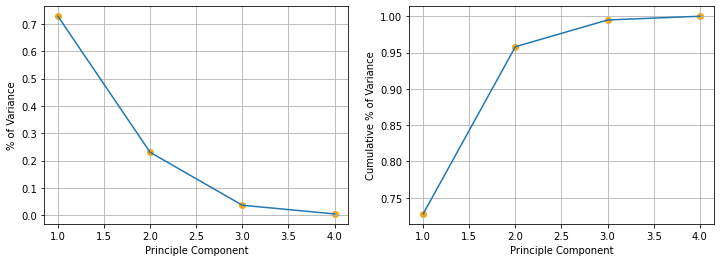

In [50]:
# Plot Principle components and % of Variance Explained
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(np.arange(1,5), pca.explained_variance_ratio_)
plt.scatter(np.arange(1,5), pca.explained_variance_ratio_, color = "orange")
plt.xlabel("Principle Component")
plt.ylabel("% of Variance")
plt.grid()

# Plot Principle Components and Cumulative % of variance
cumulative_variance = []
sum1 = 0
for i in pca.explained_variance_ratio_:
    sum1 = sum1 + i
    cumulative_variance.append(sum1)

plt.subplot(1,2,2)
plt.plot(np.arange(1,5), cumulative_variance)
plt.scatter(np.arange(1,5), cumulative_variance, color = "orange")
plt.xlabel("Principle Component")
plt.ylabel("Cumulative % of Variance")
plt.grid()
plt.show()

*2 principle components combined capturing variance of about 95 %.*
<br>*So, Build PCA again with n_components = 2*

In [51]:
# Build PCA with 2 components
pca2 = PCA(n_components = 2)

# Fit the data
pca2.fit(X_std)

# Transform the data
X_transform2 = pca2.transform(X_std)

# Create DataFrame
X_transform2 = pd.DataFrame(X_transform2, columns = ["PC1", "PC2"])

# Create Column "Species"
X_transform2["Species"] = df["Species"]

In [52]:
# Print X_transform
X_transform2.head()

,PC1,PC2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


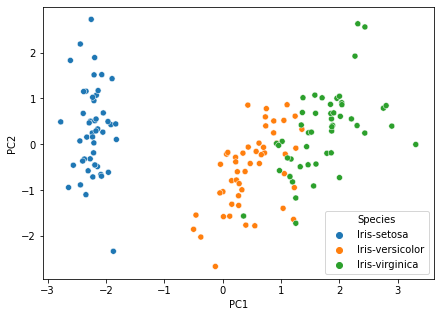

In [63]:
# Plot Principle Components
plt.figure(figsize = (7,5))
sns.scatterplot(x = X_transform2["PC1"], y = X_transform2["PC2"], hue = X_transform2["Species"])
plt.show()

**Dimension is reduced from 4 to 2 dimensions with 95% retainment of variance**